In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import os

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [11]:
train_path = "archive/fruits-360_dataset/fruits-360/Training/"
test_path = "archive/fruits-360_dataset/fruits-360/Test/"

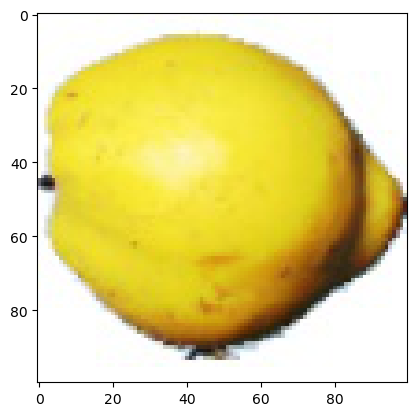

In [12]:
img =load_img(train_path+"Quince/r_305_100.jpg")
plt.imshow(img)
plt.axis('on')
plt.show()

In [14]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [15]:
model = Sequential()
model.add(Conv2D(128,3,activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add((Conv2D(64,3,activation='relu')))
model.add((Conv2D(32,3,activation='relu')))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(132,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)       

In [16]:
model.compile(loss='crossentropy',optimizer='SGD',metrics=["accuracy"])

In [19]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                     shear_range = 0.3,
                     horizontal_flip = True,
                     vertical_flip = False,
                     zoom_range= 0.3
                     )
test_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(100,100),
                                                   batch_size=32,
                                                   color_mode = "rgb",
                                                   class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size=(100,100),
                                                   batch_size=32,
                                                   color_mode = "rgb",
                                                   class_mode = "categorical")



Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [22]:
from keras.models import save_model

model.save("Fruitmodel.keras")


In [23]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [24]:
test_generator.classes[22687]

130

In [25]:
predictions = probability_model.predict(test_generator)

709/709 [==============================] - 365s 506ms/step


In [26]:
b= predictions[8]
print(b)

[0.007577   0.00757918 0.0075737  0.00757582 0.00757747 0.007581
 0.00757388 0.00757376 0.00757614 0.00757197 0.00757855 0.00757658
 0.00757192 0.00757137 0.00757088 0.00757661 0.00756979 0.00757406
 0.00757198 0.00757701 0.00757423 0.00757328 0.00757096 0.00756978
 0.0075689  0.00757364 0.00757164 0.00757103 0.00757973 0.00757869
 0.00756877 0.00757845 0.00757349 0.00757216 0.00757577 0.00756985
 0.00757361 0.00757646 0.00757359 0.00756993 0.00757619 0.00757732
 0.00757582 0.00757958 0.00756992 0.00757417 0.00757434 0.00757471
 0.0075788  0.00758179 0.00757162 0.0075783  0.00757287 0.00757662
 0.00757191 0.00758127 0.00757927 0.00757839 0.00757258 0.00758475
 0.0075845  0.00757917 0.00757262 0.00758017 0.00757701 0.00756977
 0.00757696 0.00757309 0.00757192 0.00757317 0.00757163 0.00757739
 0.00758405 0.00757758 0.00757769 0.00757811 0.00757403 0.00757918
 0.00757566 0.00757125 0.00757551 0.00757223 0.00757418 0.00757893
 0.00757577 0.00757318 0.00758036 0.00757379 0.00757615 0.007579

In [27]:
np.argmax(b)

59

In [41]:
import os
folders = "archive/fruits-360_dataset/fruits-360/Test/"
sub_folders= [name for name in os.listdir(folders)
if os.path.isdir(os.path.join(folders,name))]
print(sub_folders[49])



Grape White 4


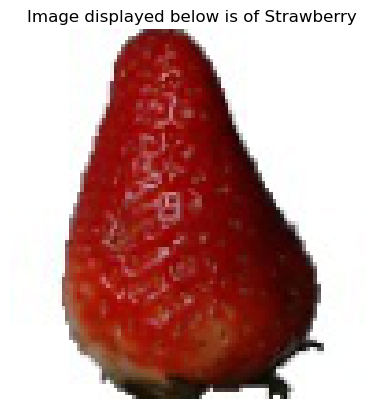

In [5]:
import os

import random
folders = "archive/fruits-360_dataset/fruits-360/Test/"
sub_folders = [name for name in os.listdir(folders) if os.path.isdir(os.path.join(folders, name))]

# Choose a random subfolder
random_subfolder = random.choice(sub_folders)
sub_folder_path = os.path.join(folders, random_subfolder)

# Get all image files in the chosen subfolder
image_files = [f for f in os.listdir(sub_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Choose a random image
random_image = random.choice(image_files)
image_path = os.path.join(sub_folder_path, random_image)

# Load and display the chosen image
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')  # To hide axis labels
plt.title(f"Image displayed below is of {random_subfolder}")
plt.show()